In [14]:
import numpy as np
import matplotlib.pyplot as plt

## TPMS Link Budget

The article "RF Link Budget Analysis of a 315MHz Wireless Link for Automotive Tire Pressure Monitoring System" presents the following link budget model for a TPMS system:
#### $P = \left( P_t \frac{G_t}{L_t}(\Phi)\right) \left( \frac{G_r(x,y,z)}{L_rL_p} \right) \left( \frac{G_{SC}}{L_{SC}} \right) \left( \frac{1}{RI_VI_E} \right) $

$P$ - Power received <br>
$P_t$ - Power transmitted <br>
$G_t$- Gain of transmitting system antenna <br>
$L_t$ - Loss in transmitting system <br>
$G_r$ - Gain of receiving system antenna <br>
$L_r$ - Loss in receiving system <br>
$L_p$ – Loss in the RF path between transmit and receiver <br>

### Simulation 1: Simple Approximation

It is difficult to find precise values for each of the above coefficients. Therefore, the following assumptions will be made for the first simulation:

1. All antenna gains will be unity (0dBi gain)
2. Losses will be due to the following factors:
   * Rubber in the tire (assume thickness of 100mm)

Power loss through the tire will be computed using the following expression: <br><br>

$\frac{P(l)}{P(0)} = e^{-2 \alpha z}$ <br><br>

Where $l$ is the thickness of the material, $P(z)$ is the power (density) at some point $z$ through that material, and $\alpha$ is the attenuation coefficient of that material. The attentuation coefficient $\alpha$ will be computed using the following expression: <br><br>
$\alpha = 2 \pi f \sqrt\frac{\mu_0 \epsilon '}{2}\left( \sqrt{1 + \left( \frac{\epsilon''}{\epsilon'} \right)^2} - 1 \right)^\frac{1}{2}$

This loss model is a crude assumption, as it assumes no reflections at each boundary. Quite frankly, it is not the best model for representing path loss. However, it should at the very minimum, give the order of magnitude of path loss experienced.

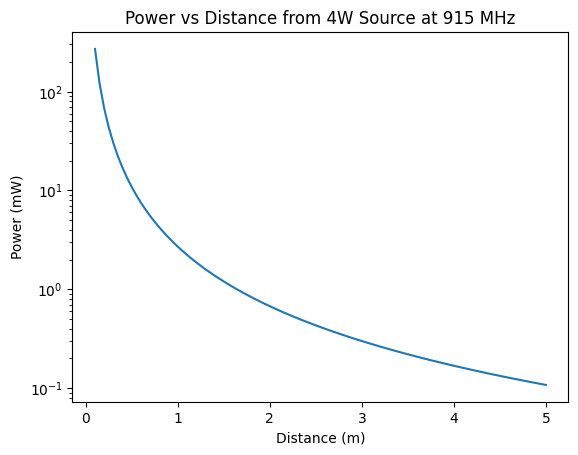

In [26]:
c = 299792458  # Speed of light in m/s
f = 915e6  # Frequency in Hz
u0 = 4 * np.pi * 1e-7
e0 = 8.85418782e-12

eRubber = 3 * e0
lossTangentRubber = 0.002

alpha = 2 * np.pi * f * np.sqrt(u0*eRubber/2) * np.sqrt(np.sqrt(1 + (lossTangentRubber**2)) - 1)

tireThickness = 100e-3
rubberPowerLoss = np.exp(-2 * alpha * tireThickness)
rubberPowerLossDecibels = 8.685889638 * alpha * tireThickness

freeSpaceWavelength = c / f

transmitPowerMilliWatts = 4000  # mW
transmitGain = 1
receiveGain = 1

distance = np.linspace(0.1, 5, 100)
receivePowerMilliWatts =  transmitPowerMilliWatts * transmitGain * rubberPowerLoss * receiveGain * (freeSpaceWavelength/(4*np.pi*distance))**2


plt.plot(distance, receivePowerMilliWatts)
plt.title("Power vs Distance from 4W Source at 915 MHz")
plt.xlabel("Distance (m)")
plt.ylabel("Power (mW)")
plt.yscale("log")